<a href="https://colab.research.google.com/github/sulaimanbehzad/Classifying-Images/blob/main/Image_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifiers
The purpose of this project is to train two classifiers:
1. Captions classifier
2. Image classifier

In [21]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [5]:
# function for reading text files into a pandas dataframe
def read_data_into_df(filespath):
  levels = 0
  for roots, dirnames, filenames in os.walk(filespath):
    if levels == 0:
      df = pd.DataFrame(columns=dirnames)
    txt_list = []
    for fn in filenames:
      txtfile_full_path = os.path.join(roots, fn)
      # print(txtfile_full_path)
      temp=pd.read_csv(txtfile_full_path,sep="\\n", header=None, error_bad_lines=False)
      # print('shape of temp: ', temp.shape)
      txt_list.append(temp.values)
      # -------------------- another approach to read txt files
      # with open(txtfile_full_path) as f:
      #   txt_list.append(f.read())
    root = os.path.split(roots) 
    root = root[1]
    # print(root)
    if levels != 0:
      df[root] = txt_list
    levels+=1
  return df


In [6]:
path_train_sentences = r'/content/drive/MyDrive/dataset/train/sentences'   
path_test_sentences =  r'/content/drive/MyDrive/dataset/test/sentences'   
train = read_data_into_df(path_train_sentences)
test = read_data_into_df(path_test_sentences)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()


## Dataframe inspection, evaluation and preprocessing


In [7]:
train.head()

,bird,aeroplane,bicycle,car,chair,dog,cat,bus,diningtable,cow,boat,motorbike,horse,pottedplant,tvmonitor,person,sheep,train,sofa
0,[[a lifeguard tower and a yellow lifeguard tru...,[[A boat is in the water and a small airplane ...,[[A man knees on the ground while talking on h...,"[[A clean, shiny black tire in the rear of a t...","[[A black cat looking at image in a mirror.], ...","[[A small white dog standing, wearing some dog...","[[A ginger cat laying on black plastic.], [An ...","[[A bus drives down a busy road.], [a bus driv...",[[A close-up of a head table set with gray nap...,[[A close-up of a cream animal with big ears a...,"[[A cruise ship docked at a coast.], [A docked...",[[A close up of the front end of a purple and ...,"[[A jockey races on the number 6 gray horse.],...",[[An indoor plant in a yellow pot by a window....,[[A home office with three computer monitors a...,[[A man driving an orange scooter through a tu...,"[[A adult and two young sheep in a field], [Ad...",[[A small train stopped on the tracks in a par...,"[[Teenagers hanging out in their room.], [Two ..."
1,[[A close up of a seagull with others in the b...,[[An airplane sitting on the tarmac at an airp...,[[A bicycle racer in front of a car which has ...,[[A BOAC Boeing 747 sitting on the airport tar...,[[A smiling woman with a beer sitting outside ...,"[[A brown dog curled up in its bed.], [A dog l...","[[A cat is looking out the window.], [A cat lo...","[[A double decker bus on a city street.], [A r...",[[A naturally stained wooden table with four c...,"[[Several cows grazing on grass in field.], [T...",[[A group of river barges with trees in the ba...,[[A helmet wearing motorcycle stuntman perform...,"[[A foal frolicking in a grassy field.], [A po...",[[A black and white cat gets into a basket of ...,"[[A television and entertainment center.], [A ...","[[A man is smiling in a garden], [A man kneeli...",[[A large field containing a group of sheep wi...,"[[A colorful train], [An old American steam en...",[[A woman is lying across the laps of two men ...
2,[[An American Eagle standing on a post with it...,[[A small plane parked at an airfield with a c...,"[[Cyclists crossing a metal bridge.], [Several...","[[A large green bus on the street.], [A large ...",[[A desk and chair are illuminated and near a ...,"[[A close up picture of a Saint Bernard.], [A ...","[[A black stripped cat], [A striped cat laying...",[[A Continental air liner parked at an airport...,[[A group of elderly people pose around a dini...,"[[a girl with glasses and a brown cow], [a wom...",[[Airplanes flying in formation over boats in ...,"[[A family preparing to ride dirt bikes.], [A ...","[[a bald man smiling with a black, white-haire...","[[A line outside of a bookstore on a street.],...","[[A man pressing a button on a television.], [...","[[A woman in a t-shirt chops mushrooms.], [A w...","[[A domestic animal stands in a pen.], [A shee...",[[An indoor train depot with trains on both si...,[[A dining table in front of a window with two...
3,"[[A blue bird standing on a lawn.], [A blue ja...",[[a larger plane in flying above a smaller pla...,"[[A person rides a bicycle on concrete.], [A w...",[[A white limo is parked on the side of a stre...,[[An smiling asian child sits beside a young w...,[[an old black woman wearing a turban and a he...,"[[A brown cat sits by a window.], [A graceful ...",[[A park garden in front of red trolleys and a...,[[Several people holding glasses of wine at ta...,"[[Two black ox with goods on their back.], [Tw...",[[a boat with two people on blue water in fron...,[[A heavy traffic scene with many cars and mot...,"[[Two brown horses in a pasture.], [Two brown ...",[[Two blue macaws sit on a perch in a lush gre...,"[[A boy looking at a computer screen.], [A boy...",[[A close-up of two women posing with their th...,[[A black sheep and a white sheep stand on gra...,"[[A long train is on train tracks.], [A yellow...",[[a living room with a birdcage in the left

In [8]:
test.head()

,aeroplane,dog,bus,boat,cow,diningtable,cat,bicycle,bird,chair,car,pottedplant,motorbike,train,person,tvmonitor,sofa,sheep,horse
0,[[A large passenger plane on a landing strip.]...,[[A black and white dog sniffing at a closed d...,"[[A view of a street filled with vehicles, peo...","[[A sailboat at sea], [A sailboat with a yello...",[[a father is introducing his daughter to a co...,[[A bronze statue of a buddy holding a candle ...,[[A cat sitting on sand looking up at the came...,[[Two African men carry a tied up animal in th...,"[[A hand holding bird seed and a small bird.],...",[[A group of people sitting around a table on ...,[[A boy sits on a horse near a group of people...,"[[A living with pink walls.], [A room with pin...",[[African man on blue bike posing with 2 frien...,[[an old wooden train heading toward an old st...,[[A guy wearing a cap backwards and standing b...,[[A close-up of a computer sitting on a desk w...,[[A dark brown dog on a blue loveseat and a li...,"[[A large ram at the top of a hill.], [Animal ...","[[Horse outfitted with riding gear.], [There a..."
1,"[[A blue airplane beside the blue water.], [A ...","[[A brown dog lying on the grass.], [A brown d...",[[A red double decker bus is picking up more p...,[[A fisherman in a small boat in the middle of...,[[a black and white photo of a cow under a tre...,[[A group of friends gathered in a restaurant ...,[[A cat looks away while laying down in an off...,"[[Bikers lean into a turn during a race.], [Ra...","[[A humming bird feeding], [A hummingbird on a...","[[A bulldog is sitting on a yellow chair, whic...",[[A blonde in a polka-dot bikini poses in fron...,[[A potted plant with only two leaves sprouted...,"[[A BMW motorcycle parked between two cars.], ...","[[A passenger train waiting in a station.], [A...",[[A large white bus parked next to a blue truc...,[[A Mickey Mouse figurine is sitting next to a...,"[[A black and white photo of a love seat.], [A...","[[A sheep with a tree in the foreground.], [Sh...",[[A boy and his mom feeding ponies through the...
2,"[[A gray jet on a tarmac.], [An airplane being...",[[An elderly woman poses beside a small child ...,"[[A double-decker bus passes a row of flags.],...","[[An ocean liner at sea.], [A picture of a lar...",[[A black and white cow looking through the fe...,[[Two people are sitting in a small antique sh...,[[A brown cat wearing a shiny collar with a bl...,[[A child holding large bags stands next to a ...,[[A bird standing on top of a wooden fencepost...,[[A boy and a girl smile while standing by som...,[[An Esso gas station with trees in the backgr...,[[Herbs grow in terra cotta plants on a balcon...,[[A black and white photo of a motorcycle layi...,[[A black train engine is facing me on the tra...,"[[a man on a dirt bike jumping very high.], [A...",[[Several televisions are on the floor and sta...,[[A woman and elderly woman sitting together p...,[[Distant view of two lambs perched on top of ...,"[[A man in a black uniform on a white horse.],..."
3,"[[An airplane facing the camera.], [A plane is...",[[A brindle dog lying on a cushion next to a p...,[[A large yellow bus is parked next to a build...,[[Boats anchor off a short distance from the s...,[[A black and white horned cow standing in a f...,[[A man holding a baby and a woman eating at a...,"[[A kitten looking at the camera.], [A kitten ...","[[A main holds two bikes near a beach.], [A yo...","[[A white bird flying up onto a tree.], [A whi...",[[An empty hallway leading into a room with br...,[[A two story building on a street with a whit...,[[A courtyard with a small pagoda in the cente...,"[[A motorcycle parked next to a car.], [A silv...","[[A moving train in a suburban area], [A train...","[[A woman in a black bikini top and jeans.], [...",[[A computer desk displays elvis memorabilia.]...,[[a blue couch with Power Puff Girls cushions ...,"[[A close-up of a lamb with its ear tagged, st...","[[A man in a tux on a white horse.], [A man we..."
4,"[[

The dataframes don't have any null values so we are good to go on that aspect  
What remains is to add tags to the captions of each type

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   bird         28 non-null     object
 1   aeroplane    28 non-null     object
 2   bicycle      28 non-null     object
 3   car          28 non-null     object
 4   chair        28 non-null     object
 5   dog          28 non-null     object
 6   cat          28 non-null     object
 7   bus          28 non-null     object
 8   diningtable  28 non-null     object
 9   cow          28 non-null     object
 10  boat         28 non-null     object
 11  motorbike    28 non-null     object
 12  horse        28 non-null     object
 13  pottedplant  28 non-null     object
 14  tvmonitor    28 non-null     object
 15  person       28 non-null     object
 16  sheep        28 non-null     object
 17  train        28 non-null     object
 18  sofa         28 non-null     object
dtypes: object(19)
memory usage: 4.3

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   aeroplane    20 non-null     object
 1   dog          20 non-null     object
 2   bus          20 non-null     object
 3   boat         20 non-null     object
 4   cow          20 non-null     object
 5   diningtable  20 non-null     object
 6   cat          20 non-null     object
 7   bicycle      20 non-null     object
 8   bird         20 non-null     object
 9   chair        20 non-null     object
 10  car          20 non-null     object
 11  pottedplant  20 non-null     object
 12  motorbike    20 non-null     object
 13  train        20 non-null     object
 14  person       20 non-null     object
 15  tvmonitor    20 non-null     object
 16  sofa         20 non-null     object
 17  sheep        20 non-null     object
 18  horse        20 non-null     object
dtypes: object(19)
memory usage: 3.1

In [11]:
for i in train['chair']:
  print(i)

[['A black cat looking at image in a mirror.']
 ['A black cat sitting on a pink chair, next to a table holding a mirror and a plant.']
 ['A black cat sitting on a pink folding chair staring into a mirror sitting on a table next to a plant.']
 ['Black cat with pink collar staring into small mirror.']
 ['The cat seems to like her reflection in the mirror.']]
[['A smiling woman with a beer sitting outside with another smiling woman.']
 ['Two seated women laughing with one holding a bottle.']
 ['two women laugh together one is driving beer']
 ['Two women sitting down laughing.']
 ['Two women sitting outside laughing.']]
[['A desk and chair are illuminated and near a laundry closet.']
 ['A room with tan walls and a washer and dryer.']
 ['A small desk with chair near a laundry closet.']
 ['Small wood desk with papers spread on it.']
 ['There is a small desk and chair in front of the laundry room.']]
[['An smiling asian child sits beside a young women near a blue mosaic table.']
 ['Asian moth

In [12]:
for index, row in train.iterrows():
  print(index, row)

0 bird           [[a lifeguard tower and a yellow lifeguard tru...
aeroplane      [[A boat is in the water and a small airplane ...
bicycle        [[A man knees on the ground while talking on h...
car            [[A clean, shiny black tire in the rear of a t...
chair          [[A black cat looking at image in a mirror.], ...
dog            [[A small white dog standing, wearing some dog...
cat            [[A ginger cat laying on black plastic.], [An ...
bus            [[A bus drives down a busy road.], [a bus driv...
diningtable    [[A close-up of a head table set with gray nap...
cow            [[A close-up of a cream animal with big ears a...
boat           [[A cruise ship docked at a coast.], [A docked...
motorbike      [[A close up of the front end of a purple and ...
horse          [[A jockey races on the number 6 gray horse.],...
pottedplant    [[An indoor plant in a yellow pot by a window....
tvmonitor      [[A home office with three computer monitors a...
person         [[A man 

In [19]:
tags = train.columns
train_transpose = train.transpose(copy=False)
X_train = pd.DataFrame.from_records(train_transpose.values)
X_train['tags'] = tags
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,tags
0,[[a lifeguard tower and a yellow lifeguard tru...,[[A close up of a seagull with others in the b...,[[An American Eagle standing on a post with it...,"[[A blue bird standing on a lawn.], [A blue ja...","[[a close up head of an ostrich], [A close up ...","[[a brown and white duck in a pond], [A duck f...",[[A black and white photo of a seagull flying ...,"[[A woman has a bird on her shoulder, and anot...",[[A blue and green hummingbird hovers near a p...,"[[A white bird is steering a shopping cart.], ...",[[A red and brown bird is perched on branches....,"[[A large stock standing next to a pond.], [A ...",[[A black and white scene of birds eating at b...,"[[A beautiful striped bird on a barren limb.],...",[[A Goldfinch is eating thistle seed from a bi...,"[[A bird holding on to a metal gate.], [A colo...",[[A black and white bird on a body of water wi...,"[[A bird is pecking at a log in a.marsh], [A s...","[[A bird is flapping its wings in the water.],...","[[Two bald eagles perched on a branch.], [Two ...",[[A black and white bird sitting on the water ...,[[A flock of birds flying over a body of water...,"[[A bunch of parakeets in a cage.], [Several c...",[[A yellow and black bird eats from a bird fee...,"[[A bird carrying a branch over the water.], [...","[[A family of hens walking down a dirt road.],...","[[A large bird is flying through the air.], [A...",[[A bird is perched on a person's gloved hand....,bird
1,[[A boat is in the water and a small airplane ...,[[An airplane sitting on the tarmac at an airp...,[[A small plane parked at an airfield with a c...,[[a larger plane in flying above a smaller pla...,[[A passenger aircraft with landing gear down....,"[[A Das Air Cargo plane sits on the runway.], ...","[[An airplane approaches a runway.], [An Swiss...",[[A green and gray plane is taking off from th...,"[[An ocean airlines airplane is on a runway.],...","[[A D-ERFW-6 in flight.], [An army green plane...","[[An AeroMexico jet taxing along a runway], [A...","[[Fighter jet formation flying over lake.], [F...",[[A blue grounded fighter jet is parked on gra...,[[Two gentleman talking in front of propeller ...,[[An airliner is loaded with supplies for its ...,"[[A fighter jet with missiles on a runway.], [...","[[Another successful take off for CSA!], [A pa...",[[A camouflaged plane sitting on the green gra...,[[A blue and yellow plan flies against a blue ...,[[A small plane grounded in a field of grass.]...,"[[A grounded passage plane in a terminal.], [A...",[[An Air Canada airplane is ascending against ...,"[[An Air Canada airplane flying in the sky.], ...",[[an airliner has taken off behind one which i...,[[A blue airplane in a tailspin at an airshow....,[[An old airplane with yellow wings and a blue...,[[A black and white photo of the right side of...,[[An old style plane awaits to be loaded with ...,aeroplane
2,[[A man knees on the ground while talking on h...,[[A bicycle racer in front of a car which has ...,"[[Cyclists crossing a metal bridge.], [Several...","[[A person rides a bicycle on concrete.], [A w...","[[A bicycle is parked by a shop.], [A bicycle ...",[[A building is surrounded by wide attractions...,"[[people riding tandem bicycle], [Spectators w...",[[A bike painted pink sitting on a sidewalk ou...,[[A little girl with a bike helmet posing by h...,[[A cyclist relaxes on a bench and gazes towar...,"[[A man parking his bike near a building.], [A...","[[A man looks on at a bicycle race.], [Spectat...",[[A bicyclist in black on a black and red raci...,"[[A bicycle racer on a road in a rural area], ...","[[A girl performing a trick on her bicycle.], ...",[[A bicycle is parked on a trail among trees.]...,[[A man on a mountain bike going down an incli...,[[A boy doing a wheelie on a plank with the be...,[[A bicycle race in a suburban neighborhood wi...,[[A woman posing in front of an apartment buil...,[[A distorted photo of a man cutt

In [20]:
tags = test.columns
test_transpose = test.transpose(copy=False)
X_test = pd.DataFrame.from_records(test_transpose.values)
X_test['tags'] = tags
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,tags
0,[[A large passenger plane on a landing strip.]...,"[[A blue airplane beside the blue water.], [A ...","[[A gray jet on a tarmac.], [An airplane being...","[[An airplane facing the camera.], [A plane is...","[[Airplane on runway in front of buildings.], ...","[[A biplane performing aerobatics], [A blue an...",[[A plane maneuvers at low altitude over the r...,[[A beautiful view in the mountains is taken i...,"[[A grounded plane], [Airplane being loaded or...",[[Formation of stunt planes flying through the...,[[An airplane flies against a colorful sky wit...,"[[A gray jet parked near the building.], [A U....",[[A fighter jet parked on the tarmac with its ...,"[[Two bi-planes are flying side by side, emitt...",[[A blue and orange airplane flying with its l...,"[[A jet flies high in the blue sky.], [A plane...",[[A large passenger jet flying close to the gr...,"[[A fighter jet on display.], [Airplane in a m...",[[An airplane is flying over a tree in the blu...,"[[A grounded passenger plane at an airport.], ...",aeroplane
1,[[A black and white dog sniffing at a closed d...,"[[A brown dog lying on the grass.], [A brown d...",[[An elderly woman poses beside a small child ...,[[A brindle dog lying on a cushion next to a p...,[[a dog in the kitchen drinking water from a b...,"[[Two dogs playing in the water.], [Two dogs s...",[[A black and white cat and dog on a striped c...,[[A man sitting on a bench looking at a dog on...,"[[A small boy laying on a sofa with a dog.], [...",[[A white animal running through snow covered ...,[[A brown and white dog standing on hind legs ...,"[[a dog napping under a small table], [A dog s...",[[A brown dog laying on a carpeted floor next ...,[[A dog is lying at the bottom of a staircase ...,[[A man walking a dog on the beach near large ...,"[[a small dog running], [A small running dog c...",[[A man in camouflage clothing is crouching be...,[[A young boy holds a puppy up in front of a s...,[[A black cat on a pillow and a grey dog on a ...,[[A chihuahua is standing on the ground lookin...,dog
2,"[[A view of a street filled with vehicles, peo...",[[A red double decker bus is picking up more p...,"[[A double-decker bus passes a row of flags.],...",[[A large yellow bus is parked next to a build...,"[[A bus], [A white bus parked by a building.],...",[[a brown double decker tour bus on a street w...,[[A school bus driving down a remote dirt road...,[[A local bus makes a stop on a quiet afternoo...,"[[A blue party bus], [A blue party bus is park...","[[A green bus drives down a road.], [A green b...",[[A car on a snow covered runway next to an Is...,[[A crowded double-decker bus station in the c...,[[An old Red London double decker bus with its...,[[A double decker bus drives on a city street....,"[[A close-up of a yellow school bus.], [a yell...","[[a yellow school bus in front of a house], [P...",[[A bus and two cars driving during a snowstor...,"[[A bus goes down a street with parked cars.],...",[[A female in jeans and a pink shirt is standi...,"[[A multicolored, open air bus with a yellow f...",bus
3,"[[A sailboat at sea], [A sailboat with a yello...",[[A fisherman in a small boat in the middle of...,"[[An ocean liner at sea.], [A picture of a lar...",[[Boats anchor off a short distance from the s...,"[[A bus parked by a harbor.], [A white bus wit...",[[A man and two women are posing for the camer...,"[[A three masted schooner lying at anchor.], [...",[[A distant view of a sailboat surrounded by t...,[[A red boat in the middle of a lake with tree...,"[[A large boat in the water at the marina.], [...",[[a view over a cliff with a big sailboat in t...,"[[Couple sailing in a small sailboat.], [The t...",[[A male and female in a moving sail boat on a...,"[[A boat is going down a river in a city.], [A...","[[A cruise ship coming into port.], [An ocean ...",[[A cruise ship in harbor with rain clouds ove...,[[A dilapidated pier and a boat in the water w...,"[

We obtained the dataframes ready to go to next phase


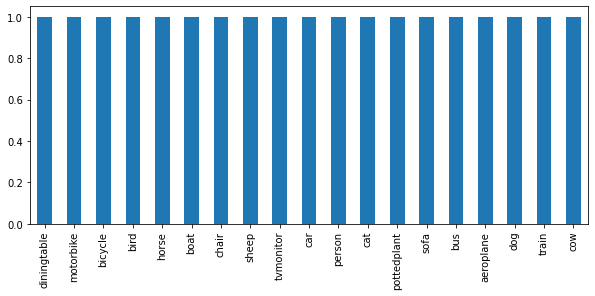

In [24]:
plt.figure(figsize=(10,4))
X_train.tags.value_counts().plot(kind='bar');